In [1]:
suppressPackageStartupMessages({
  library(tidyverse)
  library(cowplot)
  library(gridExtra)
  library(data.table)
})

cres_w_grnas = fread("cres_with_grnas.txt")
cres_w_grnas_egene = fread("cres_with_grna_eqtls.txt")

total_cres = unique(cres_w_grnas$grna_target)
cat("Total cres tested =",length(total_cres),"\n")

grna_cres_w_cgenes = unique(cres_w_grnas$grna_target[cres_w_grnas$significant == 1])
cat("Total number CREs with cgenes =",length(grna_cres_w_cgenes),"\n")

target_cgenes = unique(cres_w_grnas$target_gene[cres_w_grnas$significant == 1])
cat("Total number of target-cgene pairs =",length(target_cgenes),"\n")

cgenes = unique(cres_w_grnas$ensembl_id[cres_w_grnas$significant == 1])
cat("Total number of cgenes =",length(cgenes),"\n")

grna_cres_w_egenes = unique(cres_w_grnas_egene$grna_target)
cat("Total number CREs with egenes =",length(grna_cres_w_egenes),"\n")

length(unique(c(grna_cres_w_cgenes,grna_cres_w_egenes)))

target_egenes = unique(cres_w_grnas_egene$target_gene)
cat("Total number of target-egene pairs =",length(target_egenes),"\n")

egenes = unique(cres_w_grnas_egene$ensembl_id)
cat("Total number of egenes =",length(egenes),"\n")

cres_no_target = unique(cres_w_grnas$grna_target[!cres_w_grnas$grna_target %in% c(grna_cres_w_cgenes,grna_cres_w_egenes)])
cat("CREs without target genes =",length(cres_no_target),"\n")

overlapping_cres = grna_cres_w_cgenes[grna_cres_w_cgenes %in% grna_cres_w_egenes]
cat("Total number of overlapping CRES =",length(overlapping_cres),"\n")

overlapping_cres_cgene = unique(cres_w_grnas$target_gene[cres_w_grnas$grna_target %in% overlapping_cres & cres_w_grnas$significant == 1])
cat("Number of target cgenes overlapping CRES =",length(overlapping_cres_cgene),"\n")

overlapping_cres_egene = unique(cres_w_grnas_egene$target_gene[cres_w_grnas_egene$grna_target %in% overlapping_cres])
cat("Number of target egenes overlapping CRES =",length(overlapping_cres_egene),"\n")

overlapping_target_genes = overlapping_cres_cgene[overlapping_cres_cgene %in% overlapping_cres_egene]
cat("Number of overlapping genes =",length(overlapping_target_genes),"\n")

Total cres tested = 882 
Total number CREs with cgenes = 145 
Total number of target-cgene pairs = 180 
Total number of cgenes = 161 
Total number CREs with egenes = 515 


[1] 563

Total number of target-egene pairs = 1300 
Total number of egenes = 931 
CREs without target genes = 319 
Total number of overlapping CRES = 97 
Number of target cgenes overlapping CRES = 122 
Number of target egenes overlapping CRES = 266 
Number of overlapping genes = 69 


In [38]:
# Load gene distances and find closest gene to non-sig CREs
gene_dis = cres_w_grnas[grna_target %in% cres_no_target,] %>%
  arrange(abs(tss_distance)) %>%
  distinct(grna_target, .keep_all = T)

gwas = gene_dis %>%
  filter(!is.na(tss_distance)) %>%
  mutate(bins = case_when(
    tss_distance > -1000000 & tss_distance < -900000 ~ -1000,
    tss_distance >= -900000 & tss_distance < -800000 ~ -900,
    tss_distance >= -800000 & tss_distance < -700000 ~ -800,
    tss_distance >= -700000 & tss_distance < -600000 ~ -700,
    tss_distance >= -600000 & tss_distance < -500000 ~ -600,
    tss_distance >= -500000 & tss_distance < -400000 ~ -500,
    tss_distance >= -400000 & tss_distance < -300000 ~ -400,
    tss_distance >= -300000 & tss_distance < -200000 ~ -300,
    tss_distance >= -200000 & tss_distance < -100000 ~ -200,
    tss_distance >= -100000 & tss_distance < 0 ~ -100,
    tss_distance > 0 & tss_distance < 100000 ~ 100,
    tss_distance >= 100000 & tss_distance < 200000 ~ 200,
    tss_distance >= 200000 & tss_distance < 300000 ~ 300,
    tss_distance >= 300000 & tss_distance < 400000 ~ 400,
    tss_distance >= 400000 & tss_distance < 500000 ~ 500,
    tss_distance >= 500000 & tss_distance < 600000 ~ 600,
    tss_distance >= 600000 & tss_distance < 700000 ~ 700,
    tss_distance >= 700000 & tss_distance < 800000 ~ 800,
    tss_distance >= 800000 & tss_distance < 900000 ~ 900,
    tss_distance >= 900000 & tss_distance <= 1000000 ~ 1000,
    TRUE ~ NA_real_  # Handle edge cases
  )) %>%
  group_by(bins) %>%
  summarise(n = n(),
            prop = n / nrow(gene_dis),
            Gene_type = "GWAS (no target)")

length(cres_no_target)

length(gene_dis$grna_target)

gwas

[1] 319

[1] 319

bins,n,prop,Gene_type
<dbl>,<int>,<dbl>,<chr>
-800,2,0.006269592,GWAS (no target)
-700,1,0.003134796,GWAS (no target)
-600,1,0.003134796,GWAS (no target)
-500,2,0.006269592,GWAS (no target)
-400,2,0.006269592,GWAS (no target)
-300,12,0.037617555,GWAS (no target)
-200,31,0.097178683,GWAS (no target)
-100,126,0.394984326,GWAS (no target)
100,97,0.304075235,GWAS (no target)


In [39]:
# set color to economist color pallette
colors <- c(
  "cGenes" = "#d35e60",
    "eGenes" = "#76c0c1",
  "GWAS (no target)" = "#014d64"
)

# Bar plot of TSS
n_targets = cres_w_grnas_egene %>%
  filter(!is.na(tss_distance)) %>%
  distinct(target_gene, .keep_all = TRUE)

nrow(n_targets[n_targets$tss_distance < 100000 & n_targets$tss_distance > -100000,])/nrow(n_targets)

df1 = cres_w_grnas_egene %>%
  filter(!is.na(tss_distance)) %>%
  distinct(target_gene, .keep_all = TRUE) %>%
  mutate(bins = case_when(
    tss_distance > -1000000 & tss_distance < -900000 ~ -1000,
    tss_distance >= -900000 & tss_distance < -800000 ~ -900,
    tss_distance >= -800000 & tss_distance < -700000 ~ -800,
    tss_distance >= -700000 & tss_distance < -600000 ~ -700,
    tss_distance >= -600000 & tss_distance < -500000 ~ -600,
    tss_distance >= -500000 & tss_distance < -400000 ~ -500,
    tss_distance >= -400000 & tss_distance < -300000 ~ -400,
    tss_distance >= -300000 & tss_distance < -200000 ~ -300,
    tss_distance >= -200000 & tss_distance < -100000 ~ -200,
    tss_distance >= -100000 & tss_distance < 0 ~ -100,
    tss_distance > 0 & tss_distance < 100000 ~ 100,
    tss_distance >= 100000 & tss_distance < 200000 ~ 200,
    tss_distance >= 200000 & tss_distance < 300000 ~ 300,
    tss_distance >= 300000 & tss_distance < 400000 ~ 400,
    tss_distance >= 400000 & tss_distance < 500000 ~ 500,
    tss_distance >= 500000 & tss_distance < 600000 ~ 600,
    tss_distance >= 600000 & tss_distance < 700000 ~ 700,
    tss_distance >= 700000 & tss_distance < 800000 ~ 800,
    tss_distance >= 800000 & tss_distance < 900000 ~ 900,
    tss_distance >= 900000 & tss_distance <= 1000000 ~ 1000,
    TRUE ~ NA_real_  # Handle edge cases
  )) %>%
  group_by(bins) %>%
  summarise(n = n(),
            prop = n / nrow(n_targets),
            Gene_type = "eGenes")

n_targets2 = cres_w_grnas %>%
  distinct(target_gene, .keep_all = TRUE) %>%
  filter(significant ==1)

nrow(n_targets2[n_targets2$tss_distance < 100000 & n_targets2$tss_distance > -100000,])/nrow(n_targets2)
  
df2 <- cres_w_grnas %>% 
  distinct(target_gene, .keep_all = TRUE) %>% # Remove duplicate target-genes for different eqtl/gwas
  filter(significant == 1) %>%
  mutate(bins = case_when(
    tss_distance > -1000000 & tss_distance < -900000 ~ -1000,
    tss_distance >= -900000 & tss_distance < -800000 ~ -900,
    tss_distance >= -800000 & tss_distance < -700000 ~ -800,
    tss_distance >= -700000 & tss_distance < -600000 ~ -700,
    tss_distance >= -600000 & tss_distance < -500000 ~ -600,
    tss_distance >= -500000 & tss_distance < -400000 ~ -500,
    tss_distance >= -400000 & tss_distance < -300000 ~ -400,
    tss_distance >= -300000 & tss_distance < -200000 ~ -300,
    tss_distance >= -200000 & tss_distance < -100000 ~ -200,
    tss_distance >= -100000 & tss_distance < 0 ~ -100,
    tss_distance > 0 & tss_distance < 100000 ~ 100,
    tss_distance >= 100000 & tss_distance < 200000 ~ 200,
    tss_distance >= 200000 & tss_distance < 300000 ~ 300,
    tss_distance >= 300000 & tss_distance < 400000 ~ 400,
    tss_distance >= 400000 & tss_distance < 500000 ~ 500,
    tss_distance >= 500000 & tss_distance < 600000 ~ 600,
    tss_distance >= 600000 & tss_distance < 700000 ~ 700,
    tss_distance >= 700000 & tss_distance < 800000 ~ 800,
    tss_distance >= 800000 & tss_distance < 900000 ~ 900,
    tss_distance >= 900000 & tss_distance <= 1000000 ~ 1000,
    TRUE ~ NA_real_  # Handle edge cases
  )) %>%
  group_by(bins) %>%
  summarise(
    n = n(),
    prop = n / nrow(n_targets2),
    Gene_type = "cGenes"
  )

# Add a zero for -1000kb
#extra = data.frame(bins	= c(-1000,-800,-700,500,600),
#                   n = c(0,0,0,0,0),
#                   prop = c(0,0,0,0,0),
#                   Gene_type = "cGene")

#png("plots/figure_plots/tss_distance_barplots.png", width = 8, height = 8,units = "in", res = 300)
svg("plots/figure_plots/tss_distance_barplots.svg", width = 8, height = 8)
tss_distance_plot = bind_rows(df1, df2, gwas) %>% drop_na() %>%
  ggplot(aes(x = factor(bins), y = prop, fill = Gene_type)) +
  geom_col(color = "black", width = 0.8,position = position_dodge(width = 0.7)) +
  labs(x = "TSS Distance from TSS (kb)", y = "Proportion of CRE-gene pairs", fill = "Gene Type") +
  scale_fill_manual(
    values = colors) +
  theme_cowplot() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 16),
    legend.position = "top"
  )
tss_distance_plot
dev.off()

nrow(n_targets)
nrow(n_targets2)

[1] 0.6838407

[1] 0.8111111

png 
  2

[1] 1281

[1] 180

In [40]:
gwas = gene_dis %>%
  filter(!is.na(tss_distance),tss_distance < 100000 & tss_distance > -100000) %>%
  mutate(bins = case_when(
    tss_distance > -100000 & tss_distance < -90000 ~ -100,
    tss_distance >= -90000 & tss_distance < -80000 ~ -90,
    tss_distance >= -80000 & tss_distance < -70000 ~ -80,
    tss_distance >= -70000 & tss_distance < -60000 ~ -70,
    tss_distance >= -60000 & tss_distance < -50000 ~ -60,
    tss_distance >= -50000 & tss_distance < -40000 ~ -50,
    tss_distance >= -40000 & tss_distance < -30000 ~ -40,
    tss_distance >= -30000 & tss_distance < -20000 ~ -30,
    tss_distance >= -20000 & tss_distance < -10000 ~ -20,
    tss_distance >= -10000 & tss_distance < 0 ~ -10,
    tss_distance > 0 & tss_distance < 10000 ~ 10,
    tss_distance >= 10000 & tss_distance < 20000 ~ 20,
    tss_distance >= 20000 & tss_distance < 30000 ~ 30,
    tss_distance >= 30000 & tss_distance < 40000 ~ 40,
    tss_distance >= 40000 & tss_distance < 50000 ~ 50,
    tss_distance >= 50000 & tss_distance < 60000 ~ 60,
    tss_distance >= 60000 & tss_distance < 70000 ~ 70,
    tss_distance >= 70000 & tss_distance < 80000 ~ 80,
    tss_distance >= 80000 & tss_distance < 90000 ~ 90,
    tss_distance >= 90000 & tss_distance <= 100000 ~ 100,
    TRUE ~ NA_real_  # Handle edge cases
  )) %>%
  group_by(bins) %>%
  summarise(n = n(),
            prop = n / nrow(gene_dis[tss_distance < 100000 & tss_distance > -100000,]),
            Gene_type = "GWAS genes")

cat("proportion of cres within 10kb, with no CRE targets",gwas$prop[gwas$bins == -10] + gwas$prop[gwas$bins == 10],"\n")

# line graph of TSS
n_targets = cres_w_grnas_egene %>%
  filter(!is.na(tss_distance), tss_distance < 100000 & tss_distance > -100000) %>%
  distinct(target_gene, .keep_all = TRUE)

df1 = cres_w_grnas_egene %>%
  filter(!is.na(tss_distance), tss_distance < 100000 & tss_distance > -100000) %>%
  distinct(target_gene, .keep_all = TRUE) %>%
  mutate(bins = case_when(
    tss_distance > -100000 & tss_distance < -90000 ~ -100,
    tss_distance >= -90000 & tss_distance < -80000 ~ -90,
    tss_distance >= -80000 & tss_distance < -70000 ~ -80,
    tss_distance >= -70000 & tss_distance < -60000 ~ -70,
    tss_distance >= -60000 & tss_distance < -50000 ~ -60,
    tss_distance >= -50000 & tss_distance < -40000 ~ -50,
    tss_distance >= -40000 & tss_distance < -30000 ~ -40,
    tss_distance >= -30000 & tss_distance < -20000 ~ -30,
    tss_distance >= -20000 & tss_distance < -10000 ~ -20,
    tss_distance >= -10000 & tss_distance < 0 ~ -10,
    tss_distance > 0 & tss_distance < 10000 ~ 10,
    tss_distance >= 10000 & tss_distance < 20000 ~ 20,
    tss_distance >= 20000 & tss_distance < 30000 ~ 30,
    tss_distance >= 30000 & tss_distance < 40000 ~ 40,
    tss_distance >= 40000 & tss_distance < 50000 ~ 50,
    tss_distance >= 50000 & tss_distance < 60000 ~ 60,
    tss_distance >= 60000 & tss_distance < 70000 ~ 70,
    tss_distance >= 70000 & tss_distance < 80000 ~ 80,
    tss_distance >= 80000 & tss_distance < 90000 ~ 90,
    tss_distance >= 90000 & tss_distance <= 100000 ~ 100,
    TRUE ~ NA_real_  # Handle edge cases
  )) %>%
  filter(!is.na(bins)) %>%  # Remove any NA bins
  group_by(bins) %>%
  summarise(n = n(),
            prop = n / 1281,
            Gene_type = "eGenes")

cat("proportion of cres within 10kb, with eQTL targets",df1$prop[df1$bins == -10] + df1$prop[df1$bins == 10],"\n")

n_targets2 = cres_w_grnas %>%
  distinct(target_gene, .keep_all = TRUE) %>%
  filter(significant ==1, tss_distance < 100000 & tss_distance > -100000)
  
df2 <- cres_w_grnas %>% 
  distinct(target_gene, .keep_all = TRUE) %>% # Remove duplicate target-genes for different eqtl/gwas
  filter(significant == 1, tss_distance < 100000 & tss_distance > -100000) %>%
  mutate(bins = case_when(
    tss_distance > -100000 & tss_distance < -90000 ~ -100,
    tss_distance >= -90000 & tss_distance < -80000 ~ -90,
    tss_distance >= -80000 & tss_distance < -70000 ~ -80,
    tss_distance >= -70000 & tss_distance < -60000 ~ -70,
    tss_distance >= -60000 & tss_distance < -50000 ~ -60,
    tss_distance >= -50000 & tss_distance < -40000 ~ -50,
    tss_distance >= -40000 & tss_distance < -30000 ~ -40,
    tss_distance >= -30000 & tss_distance < -20000 ~ -30,
    tss_distance >= -20000 & tss_distance < -10000 ~ -20,
    tss_distance >= -10000 & tss_distance < 0 ~ -10,
    tss_distance > 0 & tss_distance < 10000 ~ 10,
    tss_distance >= 10000 & tss_distance < 20000 ~ 20,
    tss_distance >= 20000 & tss_distance < 30000 ~ 30,
    tss_distance >= 30000 & tss_distance < 40000 ~ 40,
    tss_distance >= 40000 & tss_distance < 50000 ~ 50,
    tss_distance >= 50000 & tss_distance < 60000 ~ 60,
    tss_distance >= 60000 & tss_distance < 70000 ~ 70,
    tss_distance >= 70000 & tss_distance < 80000 ~ 80,
    tss_distance >= 80000 & tss_distance < 90000 ~ 90,
    tss_distance >= 90000 & tss_distance <= 100000 ~ 100,
    TRUE ~ NA_real_  # Handle edge cases
  )) %>%
  filter(!is.na(bins)) %>%  # Remove any NA bins
  group_by(bins) %>%
  summarise(
    n = n(),
    prop = n / 180,
    Gene_type = "cGenes"
  )

cat("proportion of cres within 10kb, with CRISRPi targets",df2$prop[df2$bins == -10] + df2$prop[df2$bins == 10],"\n")

# Add a zero for -1000kb
extra = data.frame(bins	= c(-90),
                   n = c(0),
                   prop = c(0),
                   Gene_type = "cGenes")

# Plot with ggplot2
#png("plots/figure_plots/tss_distance_100kb.png", width = 8, height = 8,units = "in", res = 300)
svg("plots/figure_plots/tss_distance_100kb.svg", width = 8, height = 8)

colors <- c(
  "cGenes" = "#d35e60",
    "eGenes" = "#76c0c1",
  "GWAS genes" = "#014d64"
)

tss_distance_plot2 = bind_rows(df2,df1,gwas) %>%
  ggplot(aes(x = bins, y = prop, color = Gene_type)) +
  geom_line(size = 1) +          # Add a line for each group
  geom_point(size = 5) +         # Add dots at each data point
  geom_vline(xintercept = 0, linetype = "dotted", color = "black", size = 0.8) + # Add a vertical dotted line at x = 0
  scale_x_continuous(breaks = c(-100,-50,-10,10, 50, 100)) +
  scale_color_manual(values = colors) + 
  labs(
    title = "",
    x = "TSS Distance from TSS (kb)",
    y = "Proportion of CRE-gene pairs",
    color = "Gene Type"
  ) + ylim(0,0.35) +
  theme_cowplot() +    
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16, angle = 45, hjust = 1),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )

tss_distance_plot2

dev.off()

proportion of cres within 10kb, with no CRE targets 0.206278 
proportion of cres within 10kb, with eQTL targets 0.1873536 
proportion of cres within 10kb, with CRISRPi targets 0.4111111 


png 
  2

In [41]:
gene_metrics = fread("data/gene_metrics_vgh_202407.tsv", fill=T)
colnames(gene_metrics) = c("ensemble_id", colnames(gene_metrics)[1:15])

### Plot number of enhancers ###
# Extract cgene_metric
cgene_metric = gene_metrics[ensemble_id %in% cgenes, "num_enh"]
cgene_metric = na.omit(cgene_metric)
cgene_metric <- unlist(cgene_metric)
cgene_metric <- as.numeric(cgene_metric)
  
# Extract egene_metric
egene_metric = gene_metrics[ensemble_id %in% egenes, "num_enh"]
egene_metric = na.omit(egene_metric)
egene_metric <- unlist(egene_metric)
egene_metric <- as.numeric(egene_metric)

print(median(cgene_metric))
print(median(egene_metric))

test = wilcox.test(cgene_metric, egene_metric)
print(test)

  # Combine the data into a data frame for plotting
combined_data <- data.frame(
    Gene_type = c(rep("cGenes", length(cgene_metric)), rep("eGenes", length(egene_metric))),
    Value = c(cgene_metric, egene_metric)
  )

  # Calculate the y-axis limits (just above the last outlier)
stats_cgene <- boxplot.stats(cgene_metric)
stats_egene <- boxplot.stats(egene_metric)
  
  # Max of the outliers for cgene and egene
  # Check if there are outliers; if not, use the max values from the metrics
if (length(stats_cgene$out) > 0 | length(stats_egene$out) > 0) {
    max_outlier <- max(c(stats_cgene$out, stats_egene$out), na.rm = TRUE)
} else {
    max_outlier <- max(c(cgene_metric, egene_metric), na.rm = TRUE)
}
  
# Set the lower limit as the minimum value and upper limit slightly above the max outlier
min_value <- min(combined_data$Value, na.rm = TRUE)
max_value <- max_outlier * 1.1  # 10% above the highest outlier

#png("plots/figure_plots/enhancer_plot.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/enhancer_plot.svg", width = 4, height = 6)

enhancer_plot <- combined_data %>%
  filter(Value<130) %>% #improve plot look
  ggplot(aes(x = Gene_type, y = Value, fill = Gene_type)) +
  geom_violin(trim = FALSE, fill = "light grey", color = "black", alpha = 0.5) +  # Violin plot
  geom_boxplot(width = 0.1, color = "black", outlier.shape = NA) +  # Boxplot inside violin plot
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  annotate("text", x = 1.5, y = 175, label = paste0("P = ", round(test$p.value, 4)), size = 5, hjust = 0.5, family = "sans") +
  labs(title = "", x = "", y = "Number of enhancers") +
  ylim(0,175) +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )
enhancer_plot

dev.off()

[1] 26
[1] 16

	Wilcoxon rank sum test with continuity correction

data:  cgene_metric and egene_metric
W = 78164, p-value = 0.000208
alternative hypothesis: true location shift is not equal to 0



Warning message:
“Removed 134 rows containing missing values (`geom_violin()`).”


png 
  2

In [42]:
### Plot pLI ###
# Extract cgene_metric
cgene_metric = gene_metrics[ensemble_id %in% cgenes, "pLI"]
cgene_metric = na.omit(cgene_metric)
cgene_metric <- unlist(cgene_metric)
cgene_metric <- as.numeric(cgene_metric)
  
# Extract egene_metric
egene_metric = gene_metrics[ensemble_id %in% egenes, "pLI"]
egene_metric = na.omit(egene_metric)
egene_metric <- unlist(egene_metric)
egene_metric <- as.numeric(egene_metric)

cgene_metric = ifelse(cgene_metric > 0.9, 1, 0)
egene_metric = ifelse(egene_metric > 0.9, 1, 0)

#Fisher exact test
a = sum(cgene_metric == 1)
b = sum(cgene_metric == 0)
c = sum(egene_metric == 1)
d = sum(egene_metric == 0)
print(matrix(c(a,b,c,d),nrow=2,ncol=2))
test = fisher.test(matrix(c(a,b,c,d),nrow=2,ncol=2))

print(test)

# Proportion of genes with pLI > 0.9
data <- data.frame(
  Gene_type = factor(c("cGenes","eGenes"), levels = c("cGenes","eGenes")),
  Proportion = c(sum(cgene_metric == 1)/length(cgene_metric),sum(egene_metric == 1)/length(egene_metric)))
data
#png("plots/figure_plots/pli_plot.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/pli_plot.svg", width = 4, height = 6)

pli_plot = ggplot(data, aes(x = Gene_type, y = Proportion, fill = Gene_type)) +
  geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
  labs(title = "", x = "", y = "Proportion of genes \n with pLi > 0.9", color = "Gene Type") +
  annotate("text", x = 1.5, y = 0.35, label = paste0("P = ", formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5, family = "sans") +
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )

pli_plot

dev.off()

     [,1] [,2]
[1,]   44  155
[2,]  109  574

	Fisher's Exact Test for Count Data

data:  matrix(c(a, b, c, d), nrow = 2, ncol = 2)
p-value = 0.05501
alternative hypothesis: true odds ratio is not equal to 1
95 percent confidence interval:
 0.9837918 2.2436478
sample estimates:
odds ratio 
  1.494149 



Gene_type,Proportion
<fct>,<dbl>
cGenes,0.2875817
eGenes,0.2126200


png 
  2

In [43]:
### Plot Episcore ###
# Extract cgene_metric
cgene_metric = gene_metrics[ensemble_id %in% cgenes, "Episcore"]
cgene_metric = na.omit(cgene_metric)
cgene_metric <- unlist(cgene_metric)
cgene_metric <- as.numeric(cgene_metric)
  
# Extract egene_metric
egene_metric = gene_metrics[ensemble_id %in% egenes, "Episcore"]
egene_metric = na.omit(egene_metric)
egene_metric <- unlist(egene_metric)
egene_metric <- as.numeric(egene_metric)

print(median(cgene_metric))
print(median(egene_metric))

test = wilcox.test(cgene_metric, egene_metric)
print(test)

  # Combine the data into a data frame for plotting
combined_data <- data.frame(
    Gene_type = c(rep("cGenes", length(cgene_metric)), rep("eGenes", length(egene_metric))),
    Value = c(cgene_metric, egene_metric)
  )

  # Calculate the y-axis limits (just above the last outlier)
stats_cgene <- boxplot.stats(cgene_metric)
stats_egene <- boxplot.stats(egene_metric)
  
  # Max of the outliers for cgene and egene
  # Check if there are outliers; if not, use the max values from the metrics
if (length(stats_cgene$out) > 0 | length(stats_egene$out) > 0) {
    max_outlier <- max(c(stats_cgene$out, stats_egene$out), na.rm = TRUE)
} else {
    max_outlier <- max(c(cgene_metric, egene_metric), na.rm = TRUE)
}
  
# Set the lower limit as the minimum value and upper limit slightly above the max outlier
min_value <- min(combined_data$Value, na.rm = TRUE)
max_value <- max_outlier * 1.1  # 10% above the highest outlier

#png("plots/figure_plots/enhancer_plot.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/Haploinsuficiency_plot.svg", width = 4, height = 6)

enhancer_plot <- combined_data %>%
  ggplot(aes(x = Gene_type, y = Value, fill = Gene_type)) +
  geom_violin(trim = FALSE, fill = "light grey", color = "black", alpha = 0.5) +  # Violin plot
  geom_boxplot(width = 0.1, color = "black", outlier.shape = NA) +  # Boxplot inside violin plot
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  annotate("text", x = 1.5, y = 1.05, label = paste0("P = ", formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5, family = "sans") +
  labs(title = "", x = "", y = "Haploinsuficiency score") +
  ylim(0,1) +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )
enhancer_plot

dev.off()

[1] 0.4385
[1] 0.366

	Wilcoxon rank sum test with continuity correction

data:  cgene_metric and egene_metric
W = 56708, p-value = 0.005675
alternative hypothesis: true location shift is not equal to 0



Warning message:
“Removed 264 rows containing missing values (`geom_violin()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


png 
  2

In [46]:
### Expression violin plots ###
K562_bulk = fread("/gpfs/commons/groups/lappalainen_lab/jmorris/210205_STINGseq-v2/data/K562_scRNAseq_bulkRNAseq.txt") %>%
  mutate(ensembl_gene_id = str_split_fixed(ENSG, "\\.",2)[,1])

# Extract cgene_metric
cgene_metric = K562_bulk$TPM[K562_bulk$ensembl_gene_id %in% cgenes & !K562_bulk$ensembl_gene_id %in% egenes]
cgene_metric <- unlist(cgene_metric)
cgene_metric <- as.numeric(cgene_metric)
  
# Extract egene_metric
egene_df = data.frame(ensembl_gene_id = egenes) %>%
  left_join(K562_bulk[,c("ensembl_gene_id","TPM")], "ensembl_gene_id")
egene_df[is.na(egene_df)] = 0
egene_metric <- unlist(egene_df$TPM[!egene_df$ensembl_gene_id %in% cgenes])
egene_metric <- as.numeric(egene_metric)

# Extract both metric
  
# Run Wilcoxon test
median(cgene_metric)
median(egene_metric)
test = wilcox.test(cgene_metric, egene_metric)
print(test$p.value)

# Combine the data into a data frame for plotting
combined_data <- data.frame(
    Gene_type = c(rep("cGenes", length(cgene_metric)), rep("eGenes", length(egene_metric))),
    Value = c(cgene_metric, egene_metric))

#png("plots/figure_plots/k562_ex_plot.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/k562_ex_plot.svg", width = 4, height = 6)

# K562 expression violin plot
k562_ex_plot <- combined_data %>%
  filter(Value<80) %>%
  ggplot(aes(x = Gene_type, y = Value, fill = Gene_type)) +
  geom_violin(trim = FALSE, fill = "light grey", color = "black", alpha = 0.5) +  # Violin plot
  geom_boxplot(width = 0.1, color = "black", outlier.shape = NA) +  # Boxplot inside violin plot
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  ylim(0,80) +
  annotate("text", x = 1.5, y = 80, label = paste0("P = ", formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5, family = "sans") +
  labs(title = "", x = "", y = "K562 gene TPM",  fill = "Target genes") +
  theme(
      plot.title = element_text(size = 16, face = "plain", margin = margin(b = 10), hjust = 0),
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      legend.position = "none"
  )

k562_ex_plot

dev.off()

[1] 18.0953

[1] 2.865715

[1] 2.165588e-16


Warning message:
“Removed 193 rows containing missing values (`geom_violin()`).”


png 
  2

In [38]:
### GTEx whole blood gene expression violin plot ###
blood_tpm = fread("data/GTEx_Analysis_2017-06-05_v8_RNASeQCv1.1.9_gene_median_tpm.gct.gz")[, c("Name", "Whole Blood"), with = FALSE]
blood_tpm$Name = str_split_fixed(blood_tpm$Name, "\\.", 2)[,1]

# Extract cgene_metric
cgene_metric = blood_tpm$`Whole Blood`[blood_tpm$Name %in% cgenes & !blood_tpm$Name %in% egenes]
cgene_metric <- unlist(cgene_metric)
cgene_metric <- as.numeric(cgene_metric)
  
# Extract egene_metric
egene_metric = blood_tpm$`Whole Blood`[blood_tpm$Name %in% egenes & !blood_tpm$Name %in% cgenes]
egene_metric <- unlist(egene_metric)
egene_metric <- as.numeric(egene_metric)

# Extract both metric
  
# Run Wilcoxon test
median(cgene_metric)
median(egene_metric)
test = wilcox.test(cgene_metric, egene_metric)
print(test)

# Combine the data into a data frame for plotting
combined_data <- data.frame(
    Gene_type = c(rep("cGenes", length(cgene_metric)), rep("eGenes", length(egene_metric))),
    Value = c(cgene_metric, egene_metric))

#png("plots/figure_plots/blood_ex_plot.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/blood_ex_plot.svg", width = 4, height = 6)

# blood expression violin plot
blood_ex_plot <- combined_data %>%
  filter(Value<80) %>%
  ggplot(aes(x = Gene_type, y = Value, fill = Gene_type)) +
  geom_violin(trim = FALSE, fill = "light grey", color = "black", alpha = 0.5) +  # Violin plot
  geom_boxplot(width = 0.1, color = "black", outlier.shape = NA) +  # Boxplot inside violin plot
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  ylim(0,80) +
  annotate("text", x = 1.5, y = 80, label = paste0("P = ", formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5, family = "sans") +
  labs(title = "", x = "", y = "Blood gene TPM",  fill = "Target genes") +
  theme(
      plot.title = element_text(size = 16, face = "plain", margin = margin(b = 10), hjust = 0),
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      legend.position = "none"
  )

blood_ex_plot

dev.off()

[1] 12.7508

[1] 5.03962


	Wilcoxon rank sum test with continuity correction

data:  cgene_metric and egene_metric
W = 45415, p-value = 0.001545
alternative hypothesis: true location shift is not equal to 0



Warning message:
“Removed 189 rows containing missing values (`geom_violin()`).”


png 
  2

In [17]:
### Closest genes barplots ###
# Calculate proportion of significant genes in each CRE
closest_cgene = cres_w_grnas %>% distinct(target_gene, .keep_all=T) %>% # Remove duplicate target-genes for different eqtl/gwas
 group_by(grna_target) %>% mutate(dis_rank = rank(abs(tss_distance))) %>% filter(significant ==1)
one_cgene = length(unique(closest_cgene$grna_target[closest_cgene$dis_rank ==1]))/length(unique(closest_cgene$grna_target))
two_cgene = length(unique(closest_cgene$grna_target[closest_cgene$dis_rank ==2]))/length(unique(closest_cgene$grna_target))
three_cgene = length(unique(closest_cgene$grna_target[closest_cgene$dis_rank > 2]))/length(unique(closest_cgene$grna_target))

# Same for eqtl
closest_egene = cres_w_grnas_egene %>% filter(is.na(dis_rank) ==F) %>% arrange(dis_rank) %>% distinct(target_gene, .keep_all=T)
one_egene = length(unique(closest_egene$grna_target[closest_egene$dis_rank ==1]))/length(unique(closest_egene$grna_target))
two_egene = length(unique(closest_egene$grna_target[closest_egene$dis_rank ==2]))/length(unique(closest_egene$grna_target))
three_egene = length(unique(closest_egene$grna_target[closest_egene$dis_rank >2]))/length(unique(closest_egene$grna_target))

a = length(unique(closest_cgene$grna_target[closest_cgene$dis_rank ==1]))
b = length(unique(closest_cgene$grna_target[closest_cgene$dis_rank ==2]))
c = length(unique(closest_cgene$grna_target[closest_cgene$dis_rank > 2]))
e = length(unique(closest_egene$grna_target[closest_egene$dis_rank ==1]))
f = length(unique(closest_egene$grna_target[closest_egene$dis_rank ==2]))
g = length(unique(closest_egene$grna_target[closest_egene$dis_rank >2]))

# construct matrix for chi-square
data_matrix <- matrix(c(a, b, c, d, e, f), 
                      nrow = 2, 
                      byrow = TRUE)

rownames(data_matrix) <- c("cGenes", "eGenes")
colnames(data_matrix) <- c("one", "two", "more_two")

# Run Chi-Squared Test
chi_test <- chisq.test(data_matrix)

# Print results
print(chi_test)

# Barplot of gene distances
closest_data <- data.frame(
  Rank = factor(c("1st","1st","2nd","2nd",">2nd", ">2nd"), levels = c("1st", "2nd", ">2nd")),
  Gene_type = c(rep(c("cGenes", "eGenes"),3)),
  percent = c(one_cgene,one_egene,two_cgene,two_egene,
              three_cgene,three_egene))

closest_data

#png("plots/figure_plots/closest_barplots.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/closest_barplots.svg", width = 4, height = 6)

# Generate a bar plot for gene distances
closest_barplots = ggplot(closest_data, aes(x = Rank, y = percent, fill = Gene_type)) +
  geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
  theme_minimal() +
  scale_fill_manual(values = colors) +
  labs(title = "", x = "Gene distance rank", y = "Proportion of total CREs") +
  annotate("text", x = 2.4, y = 0.80, label = paste0("P = ",formatC(chi_test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5) +
  theme_cowplot() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r=10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )
closest_barplots

dev.off()


	Pearson's Chi-squared test

data:  data_matrix
X-squared = 33.78, df = 2, p-value = 4.622e-08



Rank,Gene_type,percent
<fct>,<chr>,<dbl>
1st,cGenes,0.8344828
1st,eGenes,0.7184466
2nd,cGenes,0.1379310
2nd,eGenes,0.3417476
>2nd,cGenes,0.2344828
>2nd,eGenes,0.6155340


png 
  2

In [46]:
### Number of genes barplots ###
cgenes_per_cre = cres_w_grnas %>% filter(significant ==1) %>% distinct(target_gene, .keep_all=T) %>% group_by(grna_target) %>% 
    summarise(n = n())
egenes_per_cre = cres_w_grnas_egene %>% distinct(target_gene, .keep_all=T) %>% group_by(grna_target) %>% 
    summarise(n = n())

# Chi-squared test
a = sum(cgenes_per_cre$n ==1)
b = sum(cgenes_per_cre$n ==2)
c = sum(cgenes_per_cre$n > 2)
d = sum(egenes_per_cre$n ==1)
e = sum(egenes_per_cre$n ==2)
f = sum(egenes_per_cre$n > 2)

# construct matrix for chi-square
data_matrix <- matrix(c(a, b, c, d, e, f), 
                      nrow = 2, 
                      byrow = TRUE)

rownames(data_matrix) <- c("cgenes", "egenes")
colnames(data_matrix) <- c("one", "two", "more_two")

# Run Chi-Squared Test
chi_test <- chisq.test(data_matrix)

# Print results
print(chi_test)

# Barplot of gene distances
num_genes_data <- data.frame(
  n_Genes = factor(c("1","1","2","2","2+", "2+"), levels = c("1", "2", "2+")),
  Gene_type = c(rep(c("cGenes", "eGenes"),3)),
  Proportion = c(sum(cgenes_per_cre$n ==1)/nrow(cgenes_per_cre),
              sum(egenes_per_cre$n ==1)/nrow(egenes_per_cre),
              sum(cgenes_per_cre$n ==2)/nrow(cgenes_per_cre),
              sum(egenes_per_cre$n ==2)/nrow(egenes_per_cre),
              sum(cgenes_per_cre$n > 2)/nrow(cgenes_per_cre),
              sum(egenes_per_cre$n > 2)/nrow(egenes_per_cre)))

num_genes_data

# Generate a bar plot for gene distances
#png("plots/figure_plots/num_genes_barplot.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/num_genes_barplot.svg", width = 4, height = 6)

num_genes_barplot = ggplot(num_genes_data, aes(x = n_Genes, y = Proportion, fill = Gene_type)) +
  geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
  theme_minimal() +
  labs(title = "", x = "Number of genes", y = "Proportion of total CREs") +
  annotate("text", x = 2.4, y = 0.80, label = paste0("P = ",formatC(chi_test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5) +
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r=10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )
num_genes_barplot
dev.off()


	Pearson's Chi-squared test

data:  data_matrix
X-squared = 93.163, df = 2, p-value < 2.2e-16



n_Genes,Gene_type,Proportion
<fct>,<chr>,<dbl>
1,cGenes,0.82068966
1,eGenes,0.37669903
2,cGenes,0.13103448
2,eGenes,0.26407767
2+,cGenes,0.04827586
2+,eGenes,0.35922330


png 
  2

In [34]:
###################
### Upset plot ####
###################
library(UpSetR)

# Define the sc_qtls
sc_qtls <- c("NK_cells", "B_cells", "CD4_T_cells", "CD8_T_cells", "DC_mean", "Mono_cells", "Other_cells", "Other_T_cells")

overlapping_eqtls <- cres_w_grnas_egene %>%
  filter(target_gene %in% overlapping_cres_cgene)

# Step 1: Data Preparation
venn_df <- overlapping_eqtls %>%
  mutate(eqtl = ifelse(eqtl == "GTEx", "blood", eqtl)) %>%
  mutate(group = ifelse(eqtl %in% c("blood", "GTEx"), "Bulk tissue eQTL", 
                        ifelse(eqtl %in% sc_qtls, "Sc eQTL", "Bulk cell type eQTL")),
         group = factor(group, levels = unique(group))) %>%
  mutate(uniq_id = paste(group, ensembl_id, grna_target, sep = "_")) %>% 
  distinct(uniq_id, .keep_all = TRUE)  # Remove multiple GWAS per gene and eQTL

# Step 2: Create a binary matrix for the UpSet plot
upset_data <- venn_df %>%
  select(target_gene, group) %>%
  distinct() %>%
  mutate(value = 1) %>%  # Mark presence with a value of 1
  spread(key = group, value = value, fill = 0)  # Create a wide format with binary values

# Convert to a matrix format
upset_matrix <- as.data.frame(upset_data)
upset_matrix <- upset_matrix[, -1]  # Remove target_gene column, as we just need binary columns

#png(filename = "plots/figure_plots/upset_plot.png", width = 10, height = 8, units = "in", res = 300)
svg(filename = "plots/figure_plots/upset_plot.svg", width = 10, height = 8)

# Step 3: Create the UpSet Plot
upset_plot = upset(upset_matrix, 
      sets = c("Bulk tissue eQTL", "Sc eQTL", "Bulk cell type eQTL"), 
      order.by = "freq", 
      decreasing = T,
      keep.order = FALSE, 
      main.bar.color = "black", 
      sets.bar.color = rev(c("#01a2d9","#6794a7","#014d64")),
      text.scale = c(3, 3, 2, 2, 3.3, 3),
      mainbar.y.label = "Number of intersecting \n eGenes with cGenes",
      sets.x.label = "Total ",
      query.legend = "bottom",
    )
upset_plot

dev.off()

png 
  2

In [24]:
#################################################
### Make boxplot of MAFs of intersecting snps ###
#################################################
# Load targeted GWAS variants
cres_w_grnas = fread("cres_with_grnas.txt")
# flip alleles to match gwas snp ids
temp = gsub("_", ":", cres_w_grnas$finemap_snp_intersect_grna)
temp = str_split_fixed(temp,":",4)[,2]
cres_w_grnas$snp_pos = paste0(cres_w_grnas$chr, ":", temp)
# Load sumstats to obtain MAFs
# Load GWAS summary stats
sumstats = fread("/gpfs/commons/groups/lappalainen_lab/sghatan/stingseq_eqtl_overlap/data/UKBB_sumstats/30000_formatted.tsv")
sumstats$snp_pos = paste0(sumstats$Chr,":",sumstats$Pos)
sumstats_filtered = sumstats %>% filter(snp_pos %in% cres_w_grnas$snp_pos)

cres_w_grnas_egene = fread("cres_with_grna_eqtls.txt")

grna_cres_w_cgenes = unique(cres_w_grnas$grna_target[cres_w_grnas$significant == 1])
grna_cres_w_egenes = unique(cres_w_grnas_egene$grna_target)
overlapping_cres = grna_cres_w_cgenes[grna_cres_w_cgenes %in% grna_cres_w_egenes]

plot_df = cres_w_grnas %>%
  filter(grna_target %in% c(grna_cres_w_cgenes, grna_cres_w_egenes) & !grna_target %in% overlapping_cres) %>%
  distinct(grna_target, .keep_all=T) %>%
  mutate(unique_CREs = ifelse(grna_target %in% grna_cres_w_cgenes, "cGenes","eGenes")) %>%
  left_join(sumstats_filtered[,c("snp_pos","minor_AF")], "snp_pos")

test = wilcox.test(plot_df$minor_AF[plot_df$unique_CREs == "cGenes"], plot_df$minor_AF[plot_df$unique_CREs == "eGenes"])
print(test)


	Wilcoxon rank sum test with continuity correction

data:  plot_df$minor_AF[plot_df$unique_CREs == "cGenes"] and plot_df$minor_AF[plot_df$unique_CREs == "eGenes"]
W = 7729, p-value = 0.02902
alternative hypothesis: true location shift is not equal to 0



In [23]:
length(plot_df$minor_AF[plot_df$unique_CREs == "cgenes"])
length(plot_df$minor_AF[plot_df$unique_CREs == "egenes"])

[1] 48

[1] 418

In [26]:
#png("plots/figure_plots/boxplot_maf.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/boxplot_maf.svg", width = 4, height = 6)

boxplot_maf = plot_df %>%
  filter(minor_AF < 0.40) %>%
  ggplot(aes(x = unique_CREs, y = minor_AF, fill = unique_CREs)) +
  geom_violin(trim = FALSE, fill = "light grey", color = "black", alpha = 0.5) +  # Violin plot
  geom_boxplot(width = 0.1, color = "black", outlier.shape = NA) +  # Boxplot inside violin plot
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  ylim(0,0.6) +
  annotate("text", x = 1.5, y = 0.6, label = paste0("P = ",formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5) +
  labs(title = "", x = "", y = "Minor allele frequency", fill = "Gene type") +
  theme(
      plot.title = element_text(size = 16, face = "plain", margin = margin(b = 10), hjust = 0),
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      legend.position = "none"
  )
boxplot_maf

dev.off()

Warning message:
“Removed 187 rows containing missing values (`geom_violin()`).”


png 
  2

In [28]:
#### LOOK AT MENDELIAN ENRICHMENT FILE FOR how numbers for PLOT are generated ####


data <- data.frame(
  Gene_type = factor(c("cGenes","eGenes"), levels = c("cGenes","eGenes")),
  Proportion = c(23/(23+84),53/(53+418)))

data

#png("plots/figure_plots/burden_gene_barplot.png", width = 4, height = 6,units = "in", res = 300)
svg("plots/figure_plots/burden_gene_barplot.svg", width = 4, height = 6)

burden_gene_barplot = ggplot(data, aes(x = Gene_type, y = Proportion, fill = Gene_type)) +
  geom_bar(stat = "identity", color = "black", width = 0.5, position = position_dodge(width = 0.7)) +
  theme_minimal() +
  labs(title = "", x = "", y = "Proportion of genes classified \n as gold-standard genes") +
  annotate("text", x = 1.5, y = 0.24, label = paste0("P = ", "6.8e-03"), size = 5, hjust = 0.5, family = "sans") +
  scale_fill_manual(values = colors) +
  theme_cowplot() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )

burden_gene_barplot

dev.off()

Gene_type,Proportion
<fct>,<dbl>
cGenes,0.2149533
eGenes,0.1125265


png 
  2

In [31]:
###
pp.h4.df = cres_w_grnas_egene %>%
  mutate(gene_intersect = as.factor(ifelse(target_gene %in% overlapping_target_genes,1,0))) %>%
  group_by(target_gene) %>% mutate(mean_PP.H4 = mean(PP.H4.abf,na.rm=T)) %>% # Take the average PP.H4 from multiple GWAS
  mutate(scaled_mean_PP.H4 = mean_PP.H4*2) %>% # scale pp.h4 so that 0.5 is one unit change
  distinct(target_gene,.keep_all=T) %>%
  ungroup()

test = wilcox.test(pp.h4.df$mean_PP.H4[pp.h4.df$gene_intersect==1], pp.h4.df$mean_PP.H4[pp.h4.df$gene_intersect == 0])
print(test)

pp.h4.plot = pp.h4.df %>% 
  mutate(gene_intersect = ifelse(gene_intersect == 1, "eQTL with\ncGene", "eQTL without\ncGene")) %>%
  ggplot(aes(x = gene_intersect, y = mean_PP.H4, fill = gene_intersect)) +
  geom_violin(trim = FALSE, fill = "light grey", color = "black", alpha = 0.5) +  # Violin plot
  geom_boxplot(width = 0.1, color = "black", outlier.shape = NA) +  # Boxplot inside violin plot
  theme_cowplot() +
  annotate("text", x = 1.5, y = 0.2, label = paste0("P = ", formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5, family = "sans") +
  ylim(0.5, 1) +
  xlab("") +
  ylab("Colocalization probability") +
  scale_fill_manual(name = "",
                    values = c("eQTL without\ncGene" = "#76c0c1", "eQTL with\ncGene" = "#8e6c8a"),
                    labels = c("eQTL without cGene", "eQTL with cGene")
                   ) +  # Define custom colors
  theme(
    plot.title = element_text(size = 16, face = "plain", margin = margin(b = 10), hjust = 0),
      axis.title.y = element_text(size = 16, margin = margin(r = 10)),
      axis.text.x = element_text(size = 16),
      axis.text.y = element_text(size = 16),
      legend.position = "none"
  )
#png("plots/figure_plots/pp.h4_violin_plot.png", width = 4, height = 6, units = "in", res = 300)
svg("plots/figure_plots/pp.h4_violin_plot.svg", width = 4, height = 6)
pp.h4.plot
dev.off()


	Wilcoxon rank sum test with continuity correction

data:  pp.h4.df$mean_PP.H4[pp.h4.df$gene_intersect == 1] and pp.h4.df$mean_PP.H4[pp.h4.df$gene_intersect == 0]
W = 57098, p-value = 1.434e-06
alternative hypothesis: true location shift is not equal to 0



Warning message:
“Removed 304 rows containing missing values (`geom_violin()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_text()`).”


png 
  2

In [44]:
cres_w_grnas = fread("cres_with_grnas.txt") %>%
  mutate(target_gene = paste0(grna_target,"_",ensembl_id))
cres_w_grnas_egene = fread("cres_with_grna_eqtls.txt") %>%
  mutate(target_gene = paste0(grna_target,"_",ensembl_id))

total_cres = unique(cres_w_grnas$grna_target)
grna_cres_w_cgenes = unique(cres_w_grnas$grna_target[cres_w_grnas$significant == 1])
target_cgenes = unique(cres_w_grnas$target_gene[cres_w_grnas$significant == 1])
cgenes = unique(cres_w_grnas$ensembl_id[cres_w_grnas$significant == 1])
grna_cres_w_egenes = unique(cres_w_grnas_egene$grna_target)
target_egenes = unique(cres_w_grnas_egene$target_gene)
egenes = unique(cres_w_grnas_egene$ensembl_id)
cres_no_target = unique(cres_w_grnas$grna_target[!cres_w_grnas$grna_target %in% c(grna_cres_w_cgenes,grna_cres_w_egenes)])
overlapping_cres = grna_cres_w_cgenes[grna_cres_w_cgenes %in% grna_cres_w_egenes]
overlapping_cres_cgene = unique(cres_w_grnas$target_gene[cres_w_grnas$grna_target %in% overlapping_cres & cres_w_grnas$significant == 1])
overlapping_cres_egene = unique(cres_w_grnas_egene$target_gene[cres_w_grnas_egene$grna_target %in% overlapping_cres])
overlapping_target_genes = overlapping_cres_cgene[overlapping_cres_cgene %in% overlapping_cres_egene]

# Load power
crispr.power = fread("cres_with_grnas_power.txt") %>%
  mutate(target_gene = paste0(grna_target,"_",ensembl_id)) %>%
  filter(effect_size == 0.85)

eqtl.power = fread("power_results/eqtl.power.combined.txt") %>%
  mutate(target_gene = paste0(grna_target,"_",ensembl_id)) 

# Filter to overlapping significant CREs
crispr.power.overlap = crispr.power %>%
  distinct(target_gene, .keep_all=T) %>%
  filter(target_gene %in% c(overlapping_cres_egene,overlapping_cres_cgene)) %>%
  mutate(intersect = as.factor(ifelse(target_gene %in% overlapping_target_genes, "Intersection", "No intersection")))

#Fisher exact test
a = sum(crispr.power.overlap$power > 0.79 & crispr.power.overlap$intersect == "Intersection")
b = sum(crispr.power.overlap$power > 0.79 & crispr.power.overlap$intersect == "No intersection")
c = sum(crispr.power.overlap$power < 0.8 & crispr.power.overlap$intersect == "Intersection")
d = sum(crispr.power.overlap$power < 0.8 & crispr.power.overlap$intersect == "No intersection")
print(matrix(c(a,b,c,d),nrow=2,ncol=2))
test = fisher.test(matrix(c(a,b,c,d),nrow=2,ncol=2))

# Proportion of genes with p > 0.8
data <- data.frame(
  Gene_type = factor(c("Intersection", "No \n intersection"), levels = c("Intersection", "No \n intersection")),
  Proportion = c(nrow(crispr.power.overlap[power > 0.79 & intersect == "Intersection",])/nrow(crispr.power.overlap[intersect == "Intersection",]),
                 nrow(crispr.power.overlap[power > 0.79 & intersect == "No intersection",])/nrow(crispr.power.overlap[intersect == "No intersection",])))

svg("plots/figure_plots/crispri_power_barplot.svg", width = 4, height = 6)

ggplot(data, aes(x = Gene_type, y = Proportion)) +
  geom_bar(stat = "identity", color = "black", fill = "#d35e60", width = 0.5, position = position_dodge(width = 0.7)) +
  labs(title = "", x = "", y = "Proportion of CRE-genes \n with CRISPRi power ≥ 0.80", color = "Gene Type") +
  annotate("text", x = 1.5, y = 0.9, label = paste0("P = ", formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5, family = "sans") +
  theme_cowplot() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )

dev.off()

eqtl.power.overlap = eqtl.power %>%
  distinct(target_gene, .keep_all=T) %>%
  filter(target_gene %in% c(overlapping_cres_egene,overlapping_cres_cgene)) %>%
  mutate(intersect = as.factor(ifelse(target_gene %in% overlapping_target_genes, "Intersection", "No intersection")))

#Fisher exact test
a = sum(eqtl.power.overlap$eQTL.power > 0.79 & eqtl.power.overlap$intersect == "Intersection")
b = sum(eqtl.power.overlap$eQTL.power > 0.79 & eqtl.power.overlap$intersect == "No intersection")
c = sum(eqtl.power.overlap$eQTL.power < 0.8 & eqtl.power.overlap$intersect == "Intersection")
d = sum(eqtl.power.overlap$eQTL.power < 0.8 & eqtl.power.overlap$intersect == "No intersection")
print(matrix(c(a,b,c,d),nrow=2,ncol=2))
test = fisher.test(matrix(c(a,b,c,d),nrow=2,ncol=2))

# Proportion of genes with p > 0.8
data <- data.frame(
  Gene_type = factor(c("Intersection", "No \n intersection"), levels = c("Intersection", "No \n intersection")),
  Proportion = c(nrow(eqtl.power.overlap[eQTL.power > 0.79 & intersect == "Intersection",])/nrow(eqtl.power.overlap[intersect == "Intersection",]),
                 nrow(eqtl.power.overlap[eQTL.power > 0.79 & intersect == "No intersection",])/nrow(eqtl.power.overlap[intersect == "No intersection",])))

svg("plots/figure_plots/eqtl_power_barplot.svg", width = 4, height = 6)

ggplot(data, aes(x = Gene_type, y = Proportion)) +
  geom_bar(stat = "identity", color = "black", fill = "#76c0c1", width = 0.5, position = position_dodge(width = 0.7)) +
  labs(title = "", x = "", y = "Proportion of CRE-genes \n with eQTL power ≥ 0.80") +
  annotate("text", x = 1.5, y = 1.02, label = paste0("P = ", formatC(test$p.value, format = "e", digits = 1)), size = 5, hjust = 0.5, family = "sans") +
  theme_cowplot() +
  theme(
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16, margin = margin(r = 10)),
    axis.text.x = element_text(size = 16),
    axis.text.y = element_text(size = 16),
    legend.position = "none"
  )

dev.off()

     [,1] [,2]
[1,]   56   12
[2,]   97   67


png 
  2

     [,1] [,2]
[1,]   65    3
[2,]  220    7


png 
  2

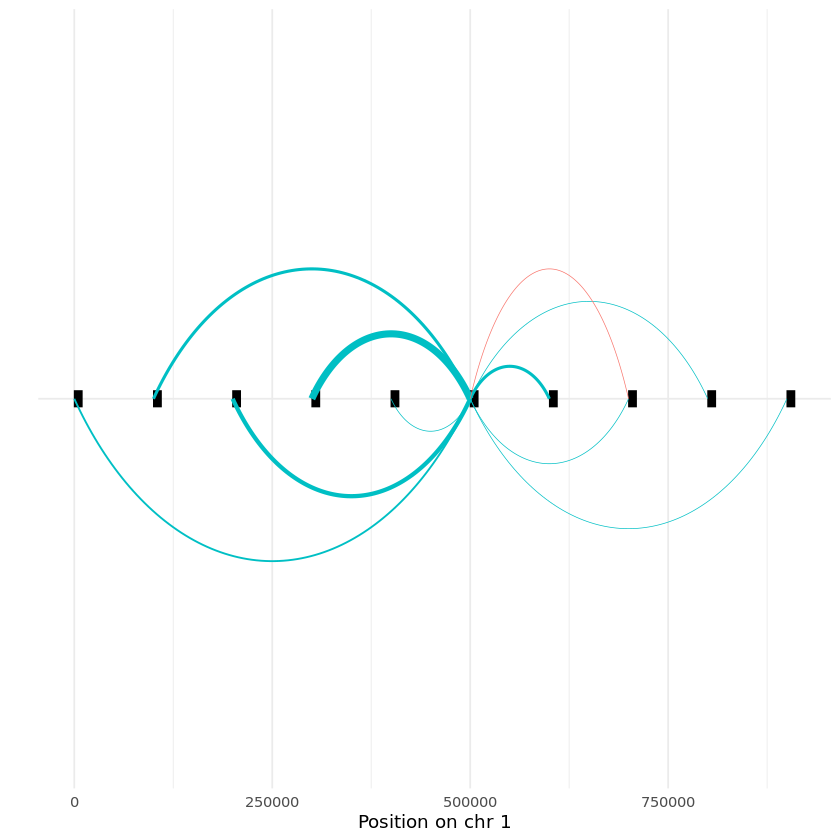

In [57]:
library(ggtranscript)

df = data.frame(seqnames = rep(1,5),
                start = seq(1,1000000,100000),
                end = seq(1,1000000,100000) + 10000,
                strand = "+",
                type = "exons",
                gene_name = "Gene",
                transcript_name = "transcript_name",
                transcript_biotype = "transcript_biotype")

links_df = data.frame(seqnames = rep(1,10),
                      start = rep(500000,10),
                      end = df$start,
                      strand = "+",
                      n_studies = c(2,5,10, 30, 1,4, 5,1 ,1 ,1))

links_df_crispr = data.frame(seqnames = 1,
                      start = 500000,
                      end = 700000,
                      strand = "+",
                      n_studies = c(1))

df %>% ggplot(aes(
        xstart = start,
        xend = end,
        y = "",
    )) + geom_range(fill = "black", height = 0.025) +
  geom_junction(
    data = links_df,
    aes(size = n_studies),
    junction.orientation = "alternating",
    junction.y.max = 0.2,
    angle = 90,
    ncp = 100, 
    colour = "#00BFC4") +
  geom_junction(
    data = links_df_crispr,
    aes(size = n_studies),
    junction.orientation = "alternating",
    junction.y.max = 0.2,
    angle = 90,
    ncp = 100, 
    colour = "#F8766D") +
  ylab("") + xlab("Position on chr 1") +
  scale_size_continuous(range = c(0.2, 2), guide = "none") +
  theme_minimal()

In [37]:
sod1_junctions

seqnames,start,end,strand,mean_count
<fct>,<int>,<int>,<fct>,<dbl>
chr21,31659787,31666448,+,0.4632353
chr21,31659842,31660554,+,0.8308824
chr21,31659842,31663794,+,0.3161765
chr21,31659842,31667257,+,4.3529412
chr21,31660351,31663789,+,0.3235294
